In [6]:
import pandas as pd
import numpy as np
from sklearn.utils import shuffle
import matplotlib.pyplot as plt

# Normalize the X variables and convert the Y variable to numeric value. 0 for Male and 1 for Female

In [7]:
# X = Height and Weight
# Y = Gender

In [8]:
df = pd.read_csv("weight-height.csv")
df.head()

,Gender,Height,Weight
0,Male,73.847017,241.893563
1,Male,68.781904,162.310473
2,Male,74.110105,212.740856
3,Male,71.730978,220.042470
4,Male,69.881796,206.349801


In [9]:
df.Gender[df.Gender == 'Male'] = 0
df.Gender[df.Gender == 'Female'] = 1
df.head()

C:\Users\USER\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
C:\Users\USER\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


,Gender,Height,Weight
0,0,73.847017,241.893563
1,0,68.781904,162.310473
2,0,74.110105,212.740856
3,0,71.730978,220.042470
4,0,69.881796,206.349801


In [10]:
data = np.array(df)

In [11]:
X = data[:,1:]
Y = data[:,0]

In [12]:
#Normalizing X values

In [13]:
X[:,0] = (X[:,0] - X[:,0].mean()) / X[:,0].std()
X[:,1] = (X[:,1] - X[:,1].mean()) / X[:,1].std()

# 2.  Divide into test and train data. 500 train data and 500 test data. 

In [14]:
#To avoid picking similar data seeing that they arranged. I shuffled it using
X, Y = shuffle(X, Y)

In [15]:
Xtrain = X[:500]
Ytrain = Y[:500]
Xtest = X[-500:]
Ytest = Y[-500:]

# 3.  Initialize random weights. Calculate the model output. 

In [30]:
D = X.shape[1]
W = np.random.randn(D)
b = 0

In [31]:
X[:250,:] = X[:250,:] - 2*np.ones((250,D))
X[250:500,:] = X[250:500,:] + 2*np.ones((250,D))

In [32]:
T = np.array([0]*250 + [1]*250)

In [33]:
ones = np.array([[1]*len(X)]).T

In [34]:
Xb = np.concatenate((ones, X), axis = 1)

In [35]:
#Randomly initialize the weights
w = np.random.randn(D +  1)

In [36]:
#Calculate the model output
z = Xb.dot(w)
z

array([-5.574033639366434, -5.396504277648036, -8.172187676512134, ...,
       -0.5218029913978075, -2.0902973430832503, -2.9442565765552886],
      dtype=object)

# 4. Using the loss function, Choose a learning rate and use gradient descent to attempt to minimize this loss. Why did you choose these parameters?  

In [37]:
def sigmoid(a):
    return 1 / (1 + np.exp(-(a.astype(float))))

In [38]:
def forward(X, W, b):
    return sigmoid(X.dot(W) + b)

In [39]:
def classification_rate(Y, P):
    return np.mean(Y == P)

In [40]:
def cross_entropy(T, pY):
    return -np.mean(T*np.log(pY) + (1 - T)*np.log(1 - pY))

In [41]:
# train loop
#When I chose an initial learning rate of 0.0001 the plot was just straight line. Does not effectively show gradient decsent.
#And a learning rate of 0.1 showed divergent behaviours. That's I settled for a learning rate of 0.001
train_costs = []
test_costs = []
learning_rate = 0.001
for i in range(10000):
    pYtrain = forward(Xtrain, W, b)
    pYtest = forward(Xtest, W, b)

    ctrain = cross_entropy(Ytrain, pYtrain)
    ctest = cross_entropy(Ytest, pYtest)
    train_costs.append(ctrain)
    test_costs.append(ctest)

    # gradient descent
    W = W - learning_rate*Xtrain.T.dot(pYtrain - Ytrain)
    b = b - learning_rate*(pYtrain - Ytrain).sum()
    if i % 1000 == 0:
        print(i, ctrain, ctest)

0 6.133341634681824 2.242883956076974
1000 1.3612705838948327 0.49826710317858075
2000 1.3404152922466106 0.5070955928880817
3000 1.340252696578488 0.5071651100060585
4000 1.340251460625478 0.5071656384734874
5000 1.3402514512323571 0.5071656424897888
6000 1.3402514511609638 0.5071656425203152
7000 1.3402514511604298 0.5071656425205442
8000 1.3402514511604298 0.5071656425205442
9000 1.3402514511604298 0.5071656425205442


# 5. Print the loss for some steps. Print the final weight, the initial model output and the model output after gradient descent 

In [42]:
print("Final train classification_rate:", classification_rate(Ytrain, np.round(pYtrain)))
print("Final test classification_rate:", classification_rate(Ytest, np.round(pYtest)))

Final train classification_rate: 0.56
Final test classification_rate: 0.508


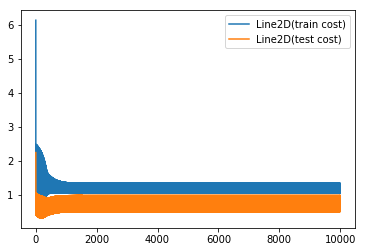

In [43]:
legend1, = plt.plot(train_costs, label='train cost')
legend2, = plt.plot(test_costs, label='test cost')
plt.legend([legend1, legend2])
plt.show()